##==================================================================##
##        File: Electrochemical-plots.ipynb
##      Author: GOTTFRID OLSSON 
##     Created: 2024-04-24
##     Updated: 2024-04-26
##       About: Reads .txt files of electrochemical cycling of cells
##              and plots the data for the Master's Thesis [TIFX05].
##==================================================================##

In [27]:
# LIBRARIES #

import numpy as np
import CSV_handler as CSV
import plot_functions as f
import matplotlib.pyplot as plt


In [ ]:
# PLOT SETTINGS #

fig_width_cm  = 16
fig_height_cm = 9

font_size_axis   = 13
font_size_tick   = 11
font_size_legend = 9

grid_major = True
grid_minor = False
legend_on = True

f.set_LaTeX_and_CMU(True) #must run before plotting

DONE: set_LaTeX_and_CMU: True


In [ ]:
# FUNCTIONS #

def shift_df_column_to_start_at_zero(df_column):
    df_column_shift_value = df_column[0]
    return df_column - df_column_shift_value


def try_get_column_from_df(df, column_name_string):
    try:
        column = df.loc[:,column_name_string]
    except:
        print("EXCEPTION: No column with name {column_name_string} (instead returns value None).")
        column = None
    return column


def get_t_V_I_error_from_Biologic_file_root_path(root_path, shift_t_to_zero=False):
    df = CSV.read(root_path, delimiter='\t') #tab separated from Biologic

    t = try_get_column_from_df(df, "time/s")
    if shift_t_to_zero:
        try:
            t = shift_df_column_to_start_at_zero(t)
        except:
            print("EXCEPTION: Could not perform shift_df_column_to_start_at_zero().")

    V = try_get_column_from_df(df, "Ewe/V")
    I = try_get_column_from_df(df, "I/mA")
    e = try_get_column_from_df(df, "error")

    return [t, V, I, e]
    

    

In [44]:
# Paths for data SEIDEP-measurements #

# SEIDEP: Deposition of Li after a 0.010 V hold and reaching a certain value of i_SEI / i_deposition (= \sigma)
SEIDEP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\SEIDEP\\'

# sigma_x, _0x, _00x means: sigma = x, 0.x, or 0.0x
SEIDEP_sigma_1_MB_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt' # SEI-formation
SEIDEP_sigma_1_CP_path   = SEIDEP_root_path + '2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt' # Li-deposition
SEIDEP_sigma_01_MB_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt'
SEIDEP_sigma_01_CP_path  = SEIDEP_root_path + '2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt'
SEIDEP_sigma_005_MB_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt'
SEIDEP_sigma_005_CP_path = SEIDEP_root_path + '2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C05.txt'

SEIDEP_sigma_1_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_1_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_1_CP_path, shift_t_to_zero=True)

SEIDEP_sigma_01_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_01_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_01_CP_path, shift_t_to_zero=True)

SEIDEP_sigma_005_MB = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_MB_path, shift_t_to_zero=True)
SEIDEP_sigma_005_CP = get_t_V_I_error_from_Biologic_file_root_path(SEIDEP_sigma_005_CP_path, shift_t_to_zero=True)

DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-18_SEIDEP-1_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-19_SEIDEP-4_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_03_CP_C10.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_02_MB_C05.txt
DONE: Reading CSV: C:\MASTER-THESIS\EXPERIMENTAL\Data\Battery-cycling\SEIDEP\2024-04-22_SEIDEP-5_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLi

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.0001, 8000) and y=(-0.21, 0.0001) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, SEI-formation, E_we=0.010 V, different $\sigma$
DONE: align_labels
DONE: set_layout_tight


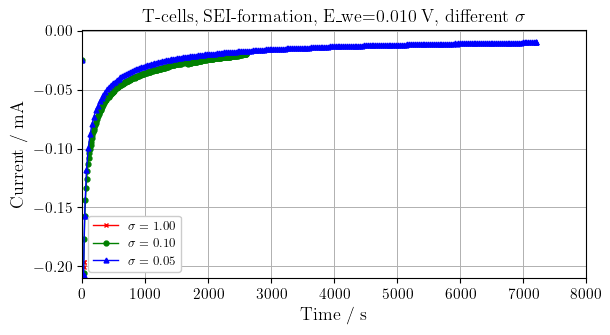

In [48]:
# PLOT SEIDEP: I vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(SEIDEP_sigma_1_MB[0],   SEIDEP_sigma_1_MB[2],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs.plot(SEIDEP_sigma_01_MB[0],  SEIDEP_sigma_01_MB[2],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs.plot(SEIDEP_sigma_005_MB[0], SEIDEP_sigma_005_MB[2], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Current / mA')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.0001, xmax=8000, ymin=-0.21, ymax=0.0001)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, SEI-formation, E_we=0.010 V, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

DONE: set_font_size: (axis, tick, legend): 13, 11, 9
DONE: set_axis_scale: X: linear, Y: linear on axs: None
DONE: set_axis_labels: on axs: None
DONE: set_axis_invert: x: False, y: False on axs: None
DONE: set_axis_limits: x=(-0.1, 5.1) and y=(-0.21, 0.01) on axs: None
DONE: set_grid: grid_major: True, grid_minor: False on axs: None
DONE: set_legend: (on, alpha, location): True, 1.0, best, on axs: None
DONE: set_title to: T-cells, Li-deposition, J=1mA/cm2, different $\sigma$
DONE: align_labels
DONE: set_layout_tight


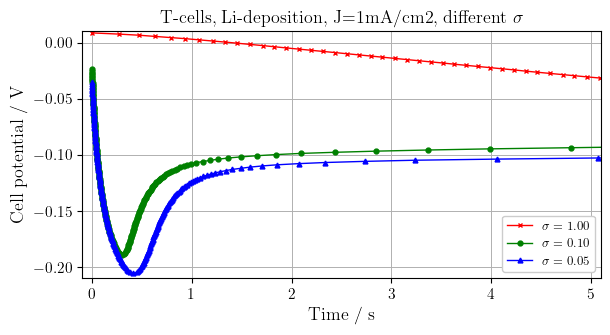

In [51]:
# PLOT SEIDEP: V vs. t (T-cells) #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)

# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs.plot(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs.plot(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs.plot(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.1, xmax=5.1, ymin=-0.21, ymax=0.01)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('T-cells, Li-deposition, J=1mA/cm2, different $\\sigma$')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

In [52]:
# Paths for data JP-measurements #

JP_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\JP-measurements\\'

T_cell = 'T-cell\\'
M_cell = 'M-cell\\'
C_cell = 'C-cell\\'


# CP #
A1_CP_path = JP_root_path + T_cell + ''
A2_CP_path = JP_root_path + T_cell + '2024-04-26_JP-A2-04_T-cell_Li-Cu_1-mm-PP-spacer_75muL-4MLiFSI-DME_inside-glovebox_added-OCV-0.1s_04_CP_C10.txt'
A3_CP_path = JP_root_path + T_cell + ''

A4_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_04_CP_C11.txt'
A5_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C10.txt'
A6_CP_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_04_CP_C11.txt'

A7_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'
A8_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C11.txt'
A9_CP_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C10.txt'

A1_CP = get_t_V_I_error_from_Biologic_file_root_path(A1_CP_path, shift_t_to_zero=True)
A2_CP = get_t_V_I_error_from_Biologic_file_root_path(A2_CP_path, shift_t_to_zero=True)
A3_CP = get_t_V_I_error_from_Biologic_file_root_path(A3_CP_path, shift_t_to_zero=True)
A4_CP = get_t_V_I_error_from_Biologic_file_root_path(A4_CP_path, shift_t_to_zero=True)
A5_CP = get_t_V_I_error_from_Biologic_file_root_path(A5_CP_path, shift_t_to_zero=True)
A6_CP = get_t_V_I_error_from_Biologic_file_root_path(A6_CP_path, shift_t_to_zero=True)
A7_CP = get_t_V_I_error_from_Biologic_file_root_path(A7_CP_path, shift_t_to_zero=True)
A8_CP = get_t_V_I_error_from_Biologic_file_root_path(A8_CP_path, shift_t_to_zero=True)
A9_CP = get_t_V_I_error_from_Biologic_file_root_path(A9_CP_path, shift_t_to_zero=True)



# MB #
A1_MB_path = JP_root_path + T_cell + ''
A2_MB_path = JP_root_path + T_cell + ''
A3_MB_path = JP_root_path + T_cell + ''

A4_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A4-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.4mm_02_MB_C11.txt'
A5_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A5-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C10.txt'
A6_MB_path = JP_root_path + M_cell + '2024-04-24_JP-measurements_sample-A6-01_M-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_Deltax110.3mm_02_MB_C11.txt'

A7_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A7-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'
A8_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A8-02_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C11.txt'
A9_MB_path = JP_root_path + C_cell + '2024-04-23_JP-measurements_sample-A9-04_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_02_MB_C10.txt'


A1_MB = get_t_V_I_error_from_Biologic_file_root_path(A1_MB_path, shift_t_to_zero=True)
A2_MB = get_t_V_I_error_from_Biologic_file_root_path(A2_MB_path, shift_t_to_zero=True)
A3_MB = get_t_V_I_error_from_Biologic_file_root_path(A3_MB_path, shift_t_to_zero=True)
A4_MB = get_t_V_I_error_from_Biologic_file_root_path(A4_MB_path, shift_t_to_zero=True)
A5_MB = get_t_V_I_error_from_Biologic_file_root_path(A5_MB_path, shift_t_to_zero=True)
A6_MB = get_t_V_I_error_from_Biologic_file_root_path(A6_MB_path, shift_t_to_zero=True)
A7_MB = get_t_V_I_error_from_Biologic_file_root_path(A7_MB_path, shift_t_to_zero=True)
A8_MB = get_t_V_I_error_from_Biologic_file_root_path(A8_MB_path, shift_t_to_zero=True)
A9_MB = get_t_V_I_error_from_Biologic_file_root_path(A9_MB_path, shift_t_to_zero=True)


#### probably want MB curves too, at least to show 'the deposition started here, here, and here for sample Ax, Ay, Az' ###


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\JP-measurements\\T-cell\\'

In [ ]:
# PLOT for each cell type, plot different currents curves #

# Create figure on which axis lives, one axis per subplot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(fig_width_cm/2.54, fig_height_cm/2.54), sharex=False, sharey=False)


# Plot your data (axs.plot, .errorbar, .hist, ...)
# SEIDEP_sigma_x_MB = [t, V, I, error]
axs[0].plot(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs[0].plot(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs[0].plot(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

axs[1].plot(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs[1].plot(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs[1].plot(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')

axs[2].plot(SEIDEP_sigma_1_CP[0],   SEIDEP_sigma_1_CP[1],   linewidth=1, linestyle='-', color='r', marker='x', markersize='3.5', label='$\\sigma=1.00$')
axs[2].plot(SEIDEP_sigma_01_CP[0],  SEIDEP_sigma_01_CP[1],  linewidth=1, linestyle='-', color='g', marker='o', markersize='3.5', label='$\\sigma=0.10$')
axs[2].plot(SEIDEP_sigma_005_CP[0], SEIDEP_sigma_005_CP[1], linewidth=1, linestyle='-', color='b', marker='^', markersize='3.5', label='$\\sigma=0.05$')


# Settings for each axis (axs)
f.set_font_size(axis=font_size_axis, tick=font_size_tick, legend=font_size_legend)
f.set_axis_scale(   axs, xScale_string='linear', yScale_string='linear')
f.set_axis_labels(  axs, x_label='Time / s', y_label='Cell potential / V')
f.set_axis_invert(  axs, x_invert=False, y_invert=False)
f.set_axis_limits(  axs, xmin=-0.1, xmax=5.1, ymin=-0.21, ymax=0.01)
f.set_grid(         axs, grid_major_on=grid_major, grid_major_linewidth=0.7, grid_minor_on=grid_minor, grid_minor_linewidth=0.3) # set_grid must be after set_axis_scale for some reason (at least with 'log')
f.set_legend(       axs, legend_on=legend_on, alpha=1.0, location='best')

f.set_title('Affect of different $J$ for the cell types')
f.align_labels(fig)
f.set_layout_tight(fig)
# PDF_path_SEIDEP = 
#f.export_figure_as_pdf(PDF_path_SEIDEP)

plt.show()

In [ ]:
# Paths for data E-measurements #

E_root_path = 'C:\\MASTER-THESIS\\EXPERIMENTAL\\Data\\Battery-cycling\\E-measurements\\'
C_cell = 'C-cell\\'

# CP #
E_Ionic_CP_path = JP_root_path + C_cell + '2024-04-29_E-measurements_sample-Ionic-03_C-cell_Cu-Li_glassfiber-separator_25muL-ionic-electrolyte_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C01.txt'
E_LiPF6_CP_path = JP_root_path + C_cell + '2024-04-25_E-measurements_sample-LiPF6-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiPF6_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'
E_LiFSI_CP_path = JP_root_path + C_cell + '2024-04-25_E-measurements_sample-LiFSI-electrolyte-01_C-cell_Cu-Li-Cellgard2400-separator_25muL-LiFSI-in-DME_outside-glovebox_sigma-0.02_added-OCV-0.1s_04_CP_C02.txt'

E_Ionic_CP = get_t_V_I_error_from_Biologic_file_root_path(A1_CP_path, shift_t_to_zero=True)
E_LiPF6_CP = get_t_V_I_error_from_Biologic_file_root_path(A2_CP_path, shift_t_to_zero=True)
E_LiFSI_CP = get_t_V_I_error_from_Biologic_file_root_path(A3_CP_path, shift_t_to_zero=True)

